

## Build Feedforward neural networks with Keras and TensorFlow for classification of CIFAR10 image dataset using the following steps:
    a. Import the necessary packages
    b. Load the training and testing data
    c. Define the network architecture using Keras
    d. Train the model using SGD/Adam optimizer
    e. Evaluate the network
    f. Plot the training loss and accuracy

In [16]:
import pandas as pd
# from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

In [17]:
cifar_train=pd.read_csv('content/cifr/train_data.csv')
x_train=cifar_train.drop('label',axis=1).values
y_train=cifar_train['label'].values


cifar_test=pd.read_csv('content/cifr/test_data.csv')
x_test=cifar_test.drop('label',axis=1).values
y_test=cifar_test['label'].values

In [7]:
X_train  = x_train/255.0
X_test = x_test/255.0

In [8]:
X_train = X_train.reshape(X_train.shape[0],-1)
X_test = X_test.reshape(X_test.shape[0],-1)

In [9]:
y_train = y_train.flatten()
y_test = y_test.flatten()

In [10]:
model = Sequential([
    Dense(64,activation ='relu',input_shape=(3072,)),
    Dense(32,activation='relu'),
    Dense(10,activation='softmax')
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                196672    
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 10)                330       
                                                                 
Total params: 199082 (777.66 KB)
Trainable params: 199082 (777.66 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [11]:
model.compile(optimizer='adam',loss=SparseCategoricalCrossentropy(),metrics=['accuracy'])

In [12]:
epochs = 10
H = model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=epochs)

Epoch 1/10
1563/1563 [==============================] - 21s 11ms/step - loss: 1.9150 - accuracy: 0.3099 - val_loss: 1.8313 - val_accuracy: 0.3516
Epoch 2/10
1563/1563 [==============================] - 15s 10ms/step - loss: 1.7412 - accuracy: 0.3755 - val_loss: 1.6647 - val_accuracy: 0.4088
Epoch 3/10
1563/1563 [==============================] - 16s 10ms/step - loss: 1.6680 - accuracy: 0.4040 - val_loss: 1.6468 - val_accuracy: 0.4100
Epoch 4/10
1563/1563 [==============================] - 17s 11ms/step - loss: 1.6326 - accuracy: 0.4147 - val_loss: 1.6384 - val_accuracy: 0.4183
Epoch 5/10
1563/1563 [==============================] - 16s 10ms/step - loss: 1.6071 - accuracy: 0.4283 - val_loss: 1.6406 - val_accuracy: 0.4249
Epoch 6/10
1563/1563 [==============================] - 16s 10ms/step - loss: 1.5952 - accuracy: 0.4304 - val_loss: 1.5805 - val_accuracy: 0.4439
Epoch 7/10
1563/1563 [==============================] - 16s 10ms/step - loss: 1.5753 - accuracy: 0.4359 - val_loss: 1.6473 -

In [13]:
predition = model.predict(X_test)
print(classification_report(y_test,predition.argmax(axis=1)))

313/313 [==============================] - 2s 5ms/step
              precision    recall  f1-score   support

           0       0.53      0.53      0.53      1000
           1       0.59      0.56      0.58      1000
           2       0.39      0.15      0.22      1000
           3       0.36      0.16      0.22      1000
           4       0.37      0.41      0.39      1000
           5       0.53      0.20      0.28      1000
           6       0.35      0.71      0.47      1000
           7       0.43      0.62      0.50      1000
           8       0.61      0.60      0.60      1000
           9       0.46      0.59      0.52      1000

    accuracy                           0.45     10000
   macro avg       0.46      0.45      0.43     10000
weighted avg       0.46      0.45      0.43     10000



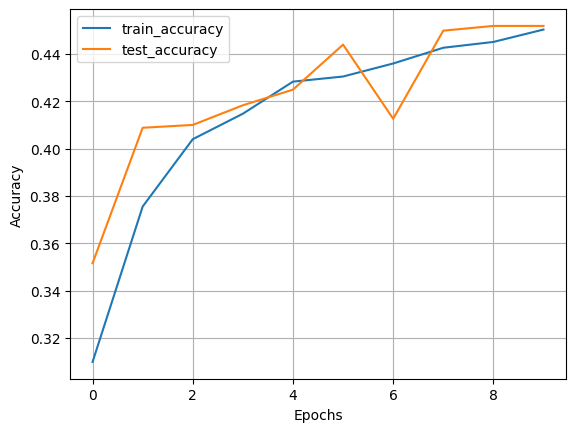

In [14]:
plt.plot(range(0,epochs),H.history['accuracy'],label = 'train_accuracy')
plt.plot(range(0,epochs),H.history['val_accuracy'],label = 'test_accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()

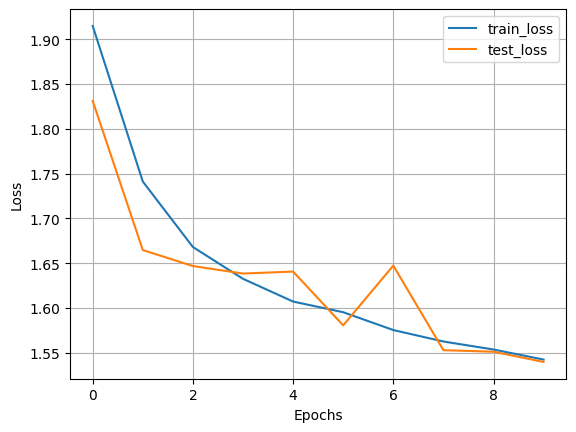

In [15]:
plt.plot(range(0,epochs),H.history['loss'],label = 'train_loss')
plt.plot(range(0,epochs),H.history['val_loss'],label = 'test_loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid();